# Решающие деревья.

В этом задании решалась задача классификации клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора (оттоковый клиент) в ближайшее время или нет.

In [ ]:
# убедимся, что версия python < 3.10
!python --version

Python 3.10.12


In [ ]:
%%capture
!python -m pip install --upgrade pip
!pip install --upgrade scikit-learn-intelex

In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
import sys
import os
import site
import pandas as pd
import numpy as np

sys.path.append(os.path.join(os.path.dirname(site.getsitepackages()[0]), "site-packages"))

In [ ]:
# зафиксируем константы
RANDOM_STATE = 42

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
np.random.seed(RANDOM_STATE)

In [ ]:

df.drop(columns=['State'], inplace=True)

df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({True: 1, False: 0})

In [ ]:

#sum_international_plan = df['International plan'].sum()
print("Сумма значений в закодированном столбце 'International plan':", df['International plan'].sum())

Сумма значений в закодированном столбце 'International plan': 323


In [ ]:

df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:

X = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:

#class_distribution = y.value_counts(normalize=True)
#normalize=True для возвращения не абсолютных значений, а относительных (частоты)
print("Распределение классов:\n", y.value_counts(normalize=True))

Распределение классов:
 Churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64


По кросс-валидации с тремя фолдами и метрикой ROC-AUC (scoring='roc_auc') обучим:

1) Логистическую регрессию

2) Метод опорных векторов (с kernel='linear')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


log_reg = LogisticRegression(max_iter=1000)
log_reg_scores = cross_val_score(log_reg, X, y, cv=3, scoring='roc_auc')
print("Среднее качество логистической регрессии (ROC-AUC):", log_reg_scores.mean())

# 2) Метод опорных векторов с параметром probability=True
svc = SVC(kernel='linear', probability=True)
svc_scores = cross_val_score(svc, X, y, cv=3, scoring='roc_auc')
print("Среднее качество SVC (ROC-AUC):", svc_scores.mean())

/usr/local/lib/python3.10/dist-packages/daal4py/sklearn/linear_model/logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/daal4py/sklearn/linear_model/logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Среднее качество логистической регрессии (ROC-AUC): 0.8108553993679851
Среднее качество SVC (ROC-AUC): 0.7563016236242781


Теперь обучим решающее дерево с параметрами по умолчанию по кросс-валидации с тремя фолдами и той же метрикой.


In [ ]:
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
tree_scores = cross_val_score(decision_tree, X, y, cv=3, scoring='roc_auc')
print("Среднее качество решающего дерева (ROC-AUC):", tree_scores.mean())

Среднее качество решающего дерева (ROC-AUC): 0.8361261850277869


Наша цель - максимально улучшить модели. Для этого:

1) у линейных моделей подберём гиперпараметр С (переберём 20 значений C в диапазоне от 0.1 до 10 с равным шагом).

2) у решающего дерева подберём max_depth (переберём глубину от 1 до 10 с шагом 1) и criterion - "gini" или "entropy".

Для подбора параметров используем GridSearchCV с тремя фолдами и метрикой roc-auc или обычные циклы.


In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'C' : np.linspace(0.1, 10.01, 20)}

gs = GridSearchCV(LogisticRegression(), params, cv=3, scoring='roc_auc')

gs.fit(Xtrain, ytrain)

gs.best_score_, gs.best_estimator_

/usr/local/lib/python3.10/dist-packages/daal4py/sklearn/linear_model/logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/daal4py/sklearn/linear_model/logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

(0.7136531810476542, LogisticRegression(C=8.445263157894736))

In [ ]:
from sklearn.metrics import roc_auc_score

lr = gs.best_estimator_

pred_lr = lr.predict_proba(Xtest)[:,1]
print(roc_auc_score(ytest, pred_lr))

0.7784269406206396


In [ ]:

param_grid_logistic = {'C': np.linspace(0.1, 10, 20)}
logistic = LogisticRegression(solver='liblinear')  # Выбор solver, который поддерживает L1 и L2
grid_search_logistic = GridSearchCV(logistic, param_grid_logistic, cv=3, scoring='roc_auc')
grid_search_logistic.fit(Xtrain, ytrain)

# Оптимальные параметры
best_logistic_model = grid_search_logistic.best_estimator_

# Предсказание на тестовых данных
y_pred_logistic = best_logistic_model.predict_proba(Xtest)[:, 1]
roc_auc_logistic = roc_auc_score(ytest, y_pred_logistic)
print(f'ROC AUC для логистической регрессии: {roc_auc_logistic}')

param_grid_tree = {
    'max_depth': range(1, 11),
    'criterion': ['gini', 'entropy']
}
tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=3, scoring='roc_auc')
grid_search_tree.fit(Xtrain, ytrain)

# Оптимальные параметры
best_tree_model = grid_search_tree.best_estimator_

# Предсказание на тестовых данных
y_pred_tree = best_tree_model.predict_proba(Xtest)[:, 1]
roc_auc_tree = roc_auc_score(ytest, y_pred_tree)
print(f'ROC AUC для дерева решений: {roc_auc_tree}')

ROC AUC для логистической регрессии: 0.8293118783200464
ROC AUC для дерева решений: 0.8555540142471297


In [ ]:
roc_auc_difference = abs(roc_auc_logistic - roc_auc_tree)
print(f'Разница значений ROC AUC: {roc_auc_difference}')

Разница значений ROC AUC: 0.026242135927083354


Нарисуем roc-кривую для наилучшей модели.

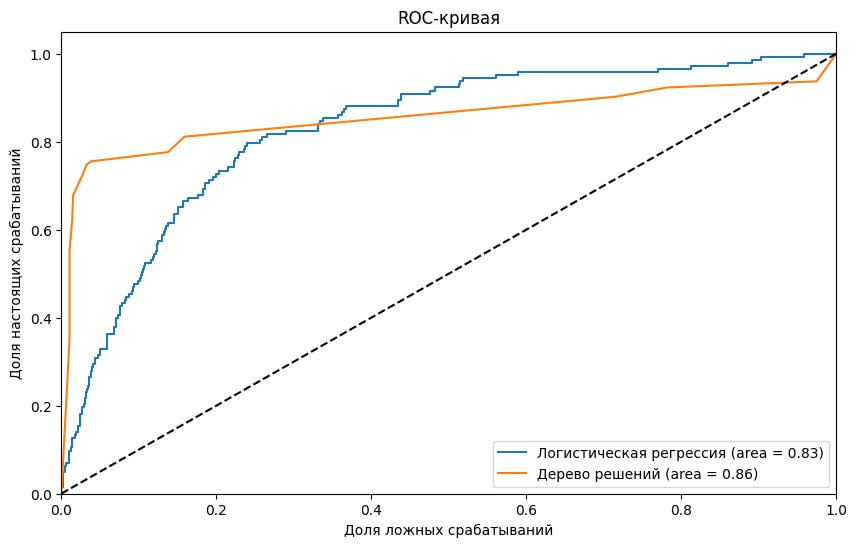

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# your code here
fpr_logistic, tpr_logistic, _ = roc_curve(ytest, y_pred_logistic)
fpr_tree, tpr_tree, _ = roc_curve(ytest, y_pred_tree)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Логистическая регрессия (area = %0.2f)' % roc_auc_logistic)
plt.plot(fpr_tree, tpr_tree, label='Дерево решений (area = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложных срабатываний')
plt.ylabel('Доля настоящих срабатываний')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

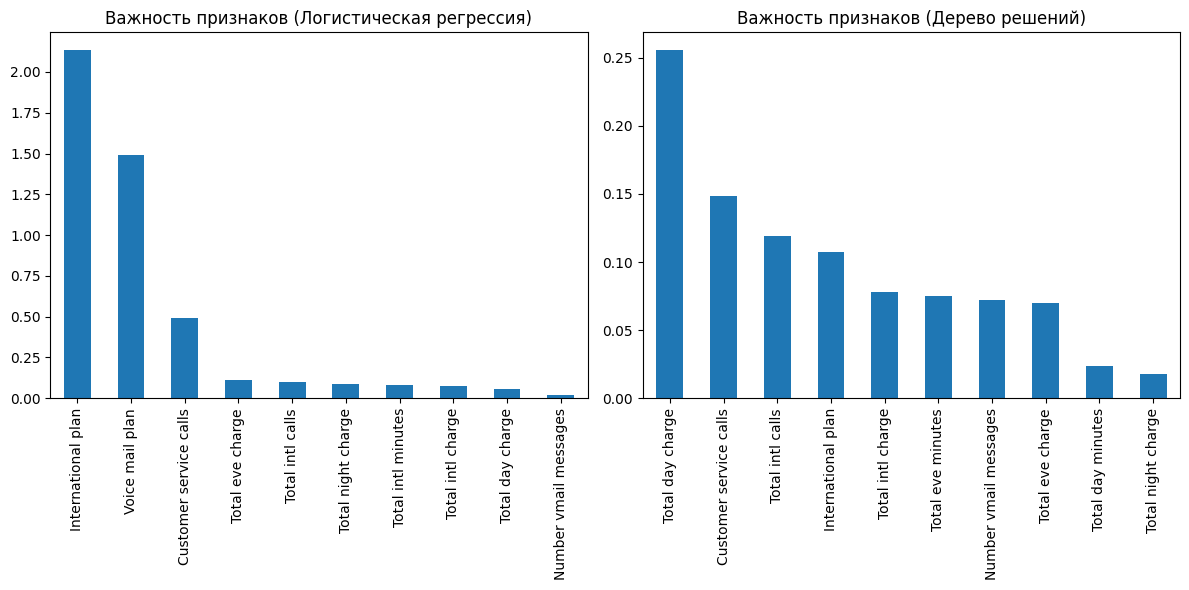

Три самых важных признака для логистической регрессии: ['International plan', 'Voice mail plan', 'Customer service calls']
Три самых важных признака для дерева решений: ['Total day charge', 'Customer service calls', 'Total intl calls']


In [ ]:

logistic_importance = np.abs(best_logistic_model.coef_[0])
logistic_feature_importance = pd.Series(logistic_importance, index=X.columns).sort_values(ascending=False)

# Важность признаков для дерева решений
tree_importance = best_tree_model.feature_importances_
tree_feature_importance = pd.Series(tree_importance, index=X.columns).sort_values(ascending=False)

# Гистограммы важности признаков
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
logistic_feature_importance.nlargest(10).plot(kind='bar', title='Важность признаков (Логистическая регрессия)')

plt.subplot(1, 2, 2)
tree_feature_importance.nlargest(10).plot(kind='bar', title='Важность признаков (Дерево решений)')

plt.tight_layout()
plt.show()

# Три самых важных признака
top_logistic_features = logistic_feature_importance.nlargest(3).index.tolist()
top_tree_features = tree_feature_importance.nlargest(3).index.tolist()

print(f'Три самых важных признака для логистической регрессии: {top_logistic_features}')
print(f'Три самых важных признака для дерева решений: {top_tree_features}')